In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import numpy as np
from scipy.constants import c, hbar, elementary_charge

### Parameters of the quantum field ###
sigma = 53e-12                 # Detector Smearing [m]

Ksig = 16/sigma                    # Determines UV Cutoff [m^-1]
a = np.pi/Ksig      # Lattice spacing induced by UV Cutoff [m]
LatticeLength = 457         # Determines IR Cutoff [a]
mcc = 1                     # Field mass [eV]
wD = 130                    # Detector gap [eV]
lam = 130                   # Coupling energy [eV]

### Units used are hbar = c = a = 1 ###
q = elementary_charge
E0 = hbar*c/(q*a)   # Energy unit

### Unitless Parameters ###
sigma = sigma/a           # Normalized Smearing
mcc = mcc/E0               # Normalized Field Mass
wD = wD/E0                 # Normalized Detector Gap   
lam = lam/E0               # Normalized Coupling Energy

### Measurement Options ###
dt= 1e-18             # Duration of each measurement window [s]
Tmin = 0           # Start of first measurement window   [s]
Tmax = 25e-18      # End of last measurement window      [s]

# convert to units hbar = c = a = 1
Tmin *= c/a
Tmax *= c/a
dt *= c/a


In [3]:
import os
os.chdir("..")
os.chdir("..")
cwd = os.getcwd() 

In [4]:
def get_csv(cwd, case_string, csv_title):
    os.chdir(cwd + '\\' + case_string)
    data = pd.read_csv(csv_title + '.csv')
    os.chdir('..')
    return data

In [5]:
data = get_csv(cwd, 'Reproduction_boundary_sensing', 'BinaryStats')
data_signal = get_csv(cwd, 'Reproduction_boundary_sensing_signal', 'BinaryStats')

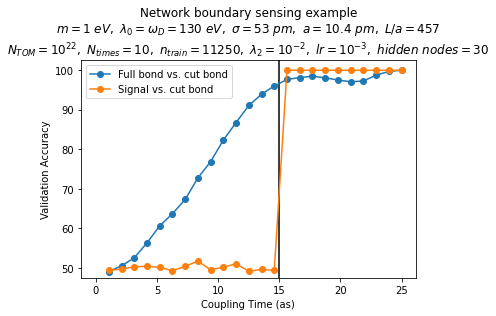

In [6]:
fig, ax = plt.subplots()
ax.plot((LatticeLength - 5*sigma)*a/c * 1e18 * np.ones(2), [40, 110], c='black')

for d, title in zip([data, data_signal], ['Full bond vs. cut bond', 'Signal vs. cut bond']):
    accuracy = d.loc[0, :].values[1:]
    
    times = (np.asarray(d.loc[0, :].index, dtype=float)*(a/c))[1:]
    ax.plot(times*1e18, accuracy*1e2, linestyle='-', marker='o', label=title)

ax.set_xlabel('Coupling Time (as)')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Network boundary sensing example' \
    + '\n$m=1~eV,~\lambda_0=\omega_D=130~eV,~\sigma=53~pm,~a=10.4~pm,~L/a = 457$'\
    + '\n$N_{TOM}=10^{22},~N_{times}=10,~n_{train}=11250,~\lambda_2=10^{-2},~lr=10^{-3},~hidden~nodes=30$')
ax.set_ylim(47.5, 102.5)
ax.set_xlim(-1.25, 26.15)
ax.legend()

In [7]:
from scipy.constants import c, hbar, elementary_charge, Boltzmann
print(hbar)
TMean = 300
CaseString = 'Reproduction_temperature_sensing_'+str(TMean)         # String Associated with this run of the code
GenerateData = True             # If False, code will read in old data
N_Samples    = 1000              # Number of examples to produce for training/validating
Regression = True

### Parameters of the quantum field ###
sigma = 42e-3                 # Detector Smearing [m]

Ksig = 7/sigma                    # Determines UV Cutoff [m^-1]
a = np.pi/Ksig      # Lattice spacing induced by UV Cutoff [m]
LatticeLength = 100         # Determines IR Cutoff [a]
mcc = 0.1*1e9*hbar/elementary_charge                     # Field mass [eV]
wD = 10*1e9*hbar/elementary_charge                    # Detector gap [eV]
lam = 10*1e9*hbar/elementary_charge                   # Coupling energy [eV]

### Units used are hbar = c = a = 1 ###
q = elementary_charge
E0 = hbar*c/(q*a)   # Energy unit

### Unitless Parameters ###
sigma = sigma/a           # Normalized Smearing
mcc = mcc/E0               # Normalized Field Mass
wD = wD/E0                 # Normalized Detector Gap   
lam = lam/E0               # Normalized Coupling Energy


### Measurement Options ###
dt= 25e-12             # Duration of each measurement window [s]
Tmin = 0           # Start of first measurement window   [s]
Tmax = 200e-12      # End of last measurement window      [s]

# convert to units k_b = hbar = c = a = 1
Tmin *= c/a
Tmax *= c/a
dt *= c/a

print(Tmin, Tmax, dt)

PlotTimes = list(np.linspace(Tmin,Tmax,int((Tmax-Tmin)/dt)+1)) # Linearly spaces measurement windows
#PlotTimes += list(np.linspace(0.8,3.2,13)) # Linearly spaces measurement windows
PlotTimes = list(set(PlotTimes))                               # Removes duplicates
PlotTimes.sort()                                               # Sorts list
N_times = 10 			          # Number of measurement times considered in each window
N_tom = 10**22                    # Number of times to repeat the whole experiment

### Defining Classes for Classification ###
# Thermal Parameters
TMean *= 1e-6*hbar*c/(Boltzmann*a)  # convert to hbar = c = a = k_b = 1 units
TDev = 0.02*TMean             # Size of Temperature Bins


1.0545718176461565e-34
0.0 3.180896772824628 0.3976120966030785


In [8]:
data = get_csv(cwd, 'Reproduction_temperature_sensing_1_mK_FINAL', 'BinaryStats')


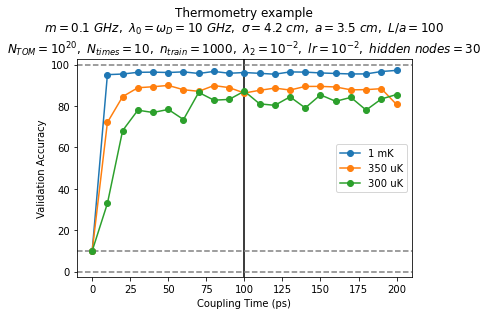

In [9]:
fig, ax = plt.subplots()
ax.plot(100*np.ones(2), [-20, 120], c='black')
ax.plot([-10, 220], 100*np.ones(2), c='grey', linestyle='--')
ax.plot([-10, 220], np.zeros(2), c='grey', linestyle='--')
ax.plot([-10, 220], 10*np.ones(2), c='grey', linestyle='--')

for d, title in zip(['Reproduction_temperature_sensing_1_mK_FINAL', 'Reproduction_temperature_sensing_350_uK_FINAL', 'Reproduction_temperature_sensing_300_uK_FINAL'], 
    ['1 mK', '350 uK', '300 uK']):
    data = get_csv(cwd, d, 'BinaryStats')
    accuracy = np.asarray([0.10] + list(data.loc[3, :].values[1:]))
    
    times = (np.asarray(data.loc[0, :].index, dtype=float)*(a/c))
    ax.plot(times*1e12, accuracy*1e2, linestyle='-', marker='o', label=title)

ax.set_xlabel('Coupling Time (ps)')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Thermometry example' \
    + '\n$m=0.1~GHz,~\lambda_0=\omega_D=10~GHz,~\sigma=4.2~cm,~a=3.5~cm,~L/a = 100$'\
    + '\n$N_{TOM}=10^{20},~N_{times}=10,~n_{train}=1000,~\lambda_2=10^{-2},~lr=10^{-2},~hidden~nodes=30$')
ax.set_ylim(-2.5, 102.5)
ax.set_xlim(-10, 210)
ax.legend()

In [16]:
N_Samples    = 4000              # Number of examples to produce for training/validating
Regression = False

### Units used are hbar = c = a = 1 ###
q = elementary_charge

### Parameters of the quantum field ###
L = 0.01 # [m]
sigma = 1e-4 # [m]
m = 0
Ksig = 7/sigma                    # Determines UV Cutoff [m^-1]
a = np.pi/Ksig
N_cutoff = int(Ksig/(np.pi/L))
E0 = hbar*c/(q*a)   # Energy unit

### Measurement Options ###
Tmin = 0           # Start of first measurement window   [s]
Tmax = 66.7*1e-12      # End of last measurement window      [s]

wDmin = 10*1e9
wDmax = 220*1e9
dw = 10*1e9

wD_list = np.linspace(wDmin, wDmax, int((wDmax-wDmin)/dw)+1) # Linearly spaces measurement windows
wD_list *= a/c
wD_list = list(set(wD_list))                               # Removes duplicates
wD_list.sort()                                               # Sorts list

N_times = 20 			          # Number of measurement times considered in each window
N_tom = 1e15                    # Number of times to repeat the whole experiment


6679883222931.72

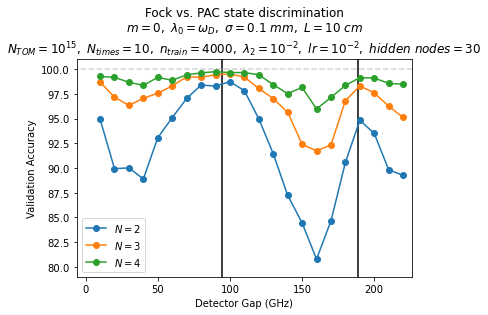

In [44]:
fig, ax = plt.subplots()
ax.plot(94.2*np.ones(2), [-20, 120], c='black')
ax.plot(2*94.2*np.ones(2), [-20, 120], c='black')
ax.plot([-20, 320], 100*np.ones(2), c='lightgrey', linestyle='--')

for N in [2, 3, 4]:
    data = get_csv(cwd, 'Fock_vs_PAC_' + str(N), 'BinaryStats')
    accuracy = np.asarray(list(data.loc[0, :]))
    times = (np.asarray(data.loc[0, :].index, dtype=float))
    ax.plot(times*c/a*1e-9, accuracy*1e2, linestyle='-', marker='o', label=r'$N='+str(N)+'$')

ax.set_xlabel('Detector Gap (GHz)')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Fock vs. PAC state discrimination' \
    + '\n$m=0,~\lambda_0=\omega_D,~\sigma=0.1~mm,~L=10~cm$'\
    + '\n$N_{TOM}=10^{15},~N_{times}=10,~n_{train}=4000,~\lambda_2=10^{-2},~lr=10^{-2},~hidden~nodes=30$')
ax.set_ylim(79, 101)
ax.set_xlim(-6, 226)
ax.legend()